# Solicitudes de información

## Explorando el dataset

In [1]:
# Libraries setup
import pandas as pd
import matplotlib.pyplot as plt
import json
import ast
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [2]:
starting = '2012-01-01'
ending = '2019-05-30'
url = 'https://alac.funde.org/api/v1/requests?startdate={}&enddate={}&page=0&limit=10000'.format(starting, ending)
print(url)

https://alac.funde.org/api/v1/requests?startdate=2012-01-01&enddate=2019-05-30&page=0&limit=10000


In [3]:
data = pd.read_json(url)

In [4]:
data.shape

(560, 16)

In [5]:
data.columns

Index(['_id', 'case_id', 'comment', 'date', 'detail', 'documents', 'finish',
       'office', 'office_id', 'overview', 'ref', 'result', 'start', 'status',
       'updates', 'url'],
      dtype='object')

In [6]:
## Creating a new attribute: month
data['month'] = data.date.apply(lambda x: str(x)[:7])
data['reqs'] = data.detail.apply(lambda x: str(x).strip().split('\n'))
data['num'] = data.reqs.apply(lambda x: len(x))

In [7]:
data.to_csv('input/requests.csv', index=False)

## Peticiones por mes

In [8]:
data = pd.read_csv('input/requests.csv')
aux = data.groupby(['month', 'status']).sum()['num'].reset_index()
by_month = pd.crosstab(aux.month, aux.status, aux.num, aggfunc=sum).fillna(0)

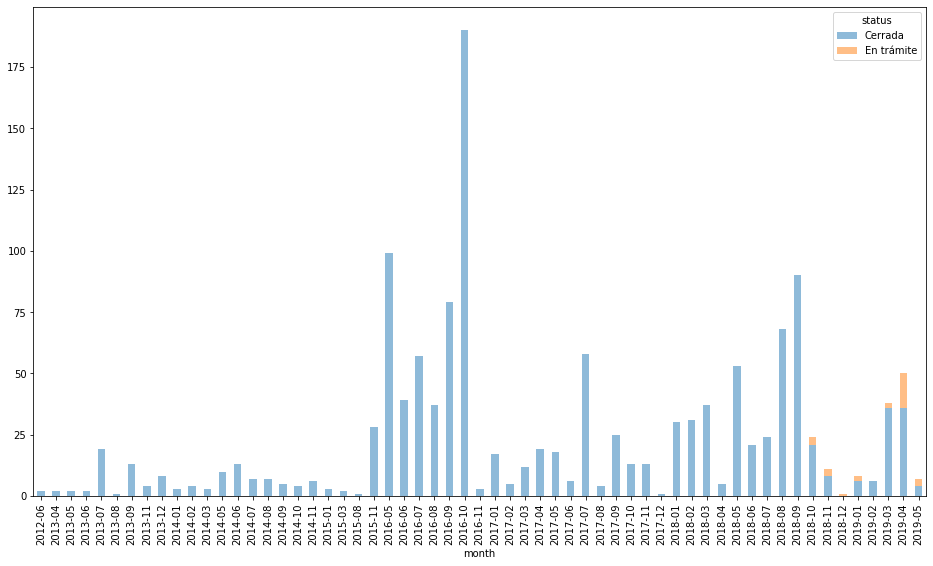

In [9]:
ax = by_month.plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [10]:
by_month['Total'] = by_month['Cerrada'] + by_month['En trámite']
by_month

status,Cerrada,En trámite,Total
month,,,
2012-06,2.0,0.0,2.0
2013-04,2.0,0.0,2.0
2013-05,2.0,0.0,2.0
2013-06,2.0,0.0,2.0
2013-07,19.0,0.0,19.0
2013-08,1.0,0.0,1.0
2013-09,13.0,0.0,13.0
2013-11,4.0,0.0,4.0
2013-12,8.0,0.0,8.0


In [11]:
by_month.sum()

status
Cerrada       1320.0
En trámite      28.0
Total         1348.0
dtype: float64

## Tipo de resultados

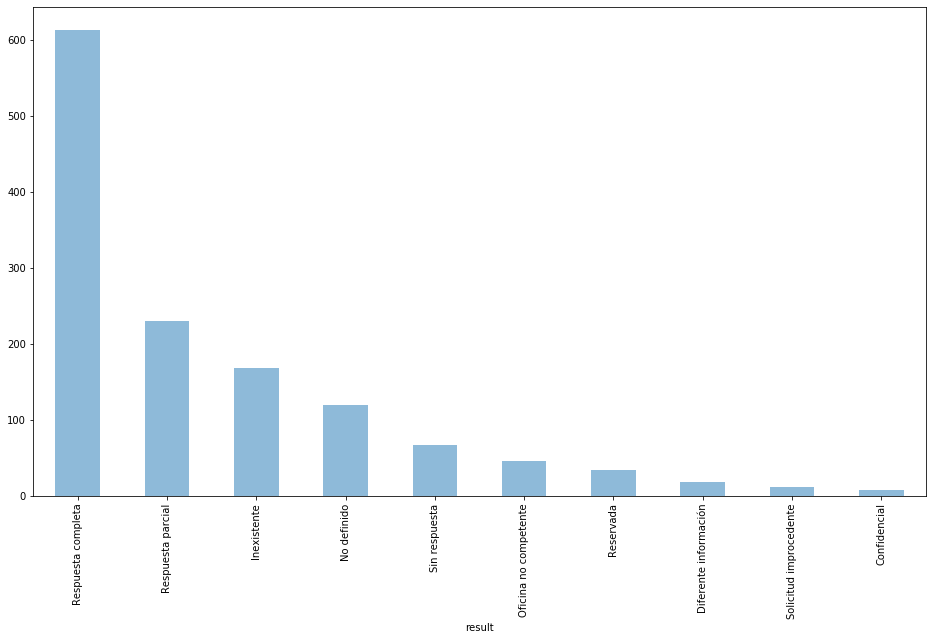

In [12]:
by_result = data[data.status == 'Cerrada'].groupby('result').sum()['num'].sort_values(ascending=False)
by_result.plot(kind='bar', figsize=(16,9), alpha=0.5)

In [13]:
pd.DataFrame(by_result)

,num
result,
Respuesta completa,613
Respuesta parcial,230
Inexistente,169
No definido,120
Sin respuesta,67
Oficina no competente,47
Reservada,35
Diferente información,19
Solicitud improcedente,12


In [14]:
by_result.sum()

1320

## Oficinas

In [15]:
aux = data.groupby(['office', 'status']).sum()['num'].reset_index()
by_office = pd.crosstab(aux.office, aux.status, aux.num, aggfunc=sum).fillna(0)
by_office['Total'] = by_office['Cerrada'] + by_office['En trámite']
by_office = by_office.sort_values('Total', ascending=False)

In [16]:
by_office[0:25]

status,Cerrada,En trámite,Total
office,,,
Presidencia de la República,102.0,2.0,104.0
Organo Judicial y Corte Suprema de Justicia,66.0,0.0,66.0
Corte de Cuentas de la República,63.0,1.0,64.0
Ministerio de Hacienda,57.0,2.0,59.0
Asamblea Legislativa,55.0,0.0,55.0
Universidad de El Salvador,54.0,0.0,54.0
Instituto de Acceso a la Información Pública,47.0,1.0,48.0
Alcaldía de San Salvador,44.0,0.0,44.0
Viceministerio de Transporte,43.0,0.0,43.0


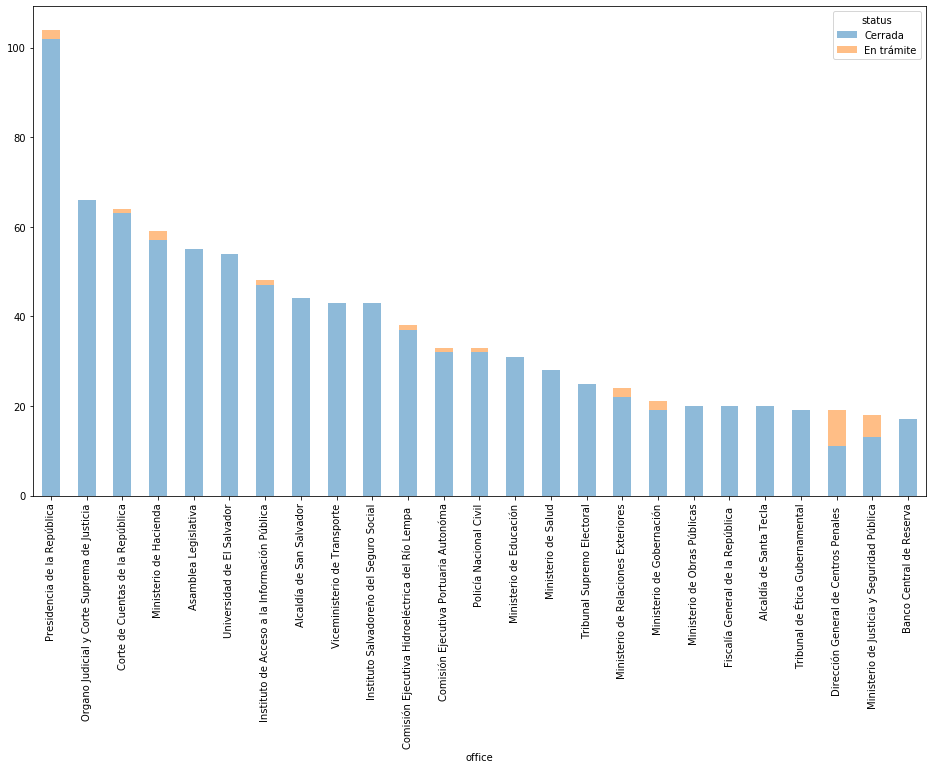

In [17]:
by_office[0:25][['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [18]:
by_office.reset_index().office.to_csv('offices.csv', index=False, header=True)

In [19]:
sp = pd.read_csv('sector_programs.csv')
sp.head()

,office,sector,program,function
0,Alcaldía de San Salvador,Municipalidades,Municipalidades,Desarrollo territorial
1,Academia Nacional de Seguridad Pública,Ejecutivo,Descentralizadas,Seguridad y justicia
2,Administración Nacional de Acueductos y Alcant...,Ejecutivo,Descentralizadas,Desarrollo social
3,Alcadía de Zacatecoluca,Municipalidades,Municipalidades,Desarrollo territorial
4,Alcaldía Municipal de Ahuachapán,Municipalidades,Municipalidades,Desarrollo territorial


In [20]:
by_office = sp.merge(by_office, on='office')

In [21]:
by_program = by_office.groupby('program').sum().sort_values('Total', ascending=False)
by_program

,Cerrada,En trámite,Total
program,,,
Gob. Central,679.0,24.0,703.0
Descentralizadas,277.0,2.0,279.0
Municipalidades,159.0,2.0,161.0
Legislativo,55.0,0.0,55.0
Financieras,21.0,0.0,21.0
Partidos,16.0,0.0,16.0


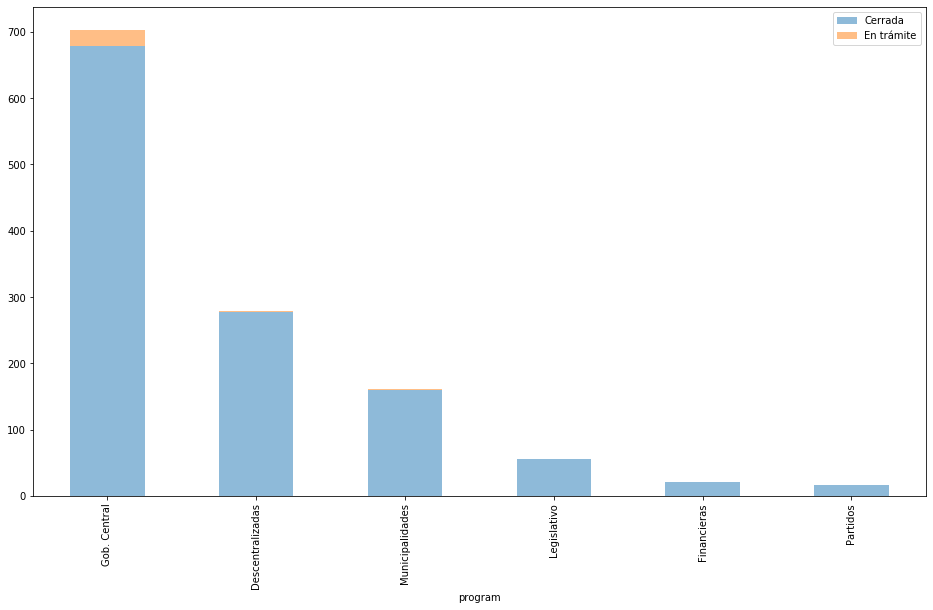

In [22]:
by_program[['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [23]:
by_sector = by_office.groupby('sector').sum().sort_values('Total', ascending=False)
by_sector

,Cerrada,En trámite,Total
sector,,,
Ejecutivo,724.0,24.0,748.0
Municipalidades,159.0,2.0,161.0
Org. Control,157.0,2.0,159.0
Judicial,96.0,0.0,96.0
Legislativo,55.0,0.0,55.0
Partidos,16.0,0.0,16.0


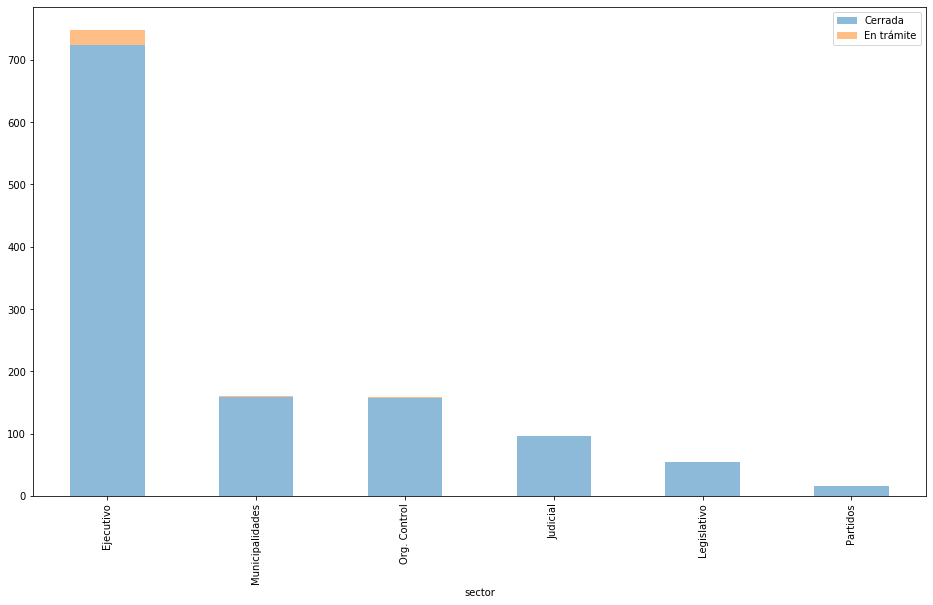

In [24]:
by_sector[['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

In [25]:
by_function = by_office.groupby('function').sum().sort_values('Total', ascending=False)
by_function

,Cerrada,En trámite,Total
function,,,
Conducción,425.0,10.0,435.0
Desarrollo económico,233.0,2.0,235.0
Desarrollo social,212.0,0.0,212.0
Seguridad y justicia,178.0,14.0,192.0
Desarrollo territorial,159.0,2.0,161.0


In [26]:
by_function / by_function.sum().sum() * 100

,Cerrada,En trámite,Total
function,,,
Conducción,17.206478,0.404858,17.611336
Desarrollo económico,9.433198,0.080972,9.514170
Desarrollo social,8.582996,0.000000,8.582996
Seguridad y justicia,7.206478,0.566802,7.773279
Desarrollo territorial,6.437247,0.080972,6.518219


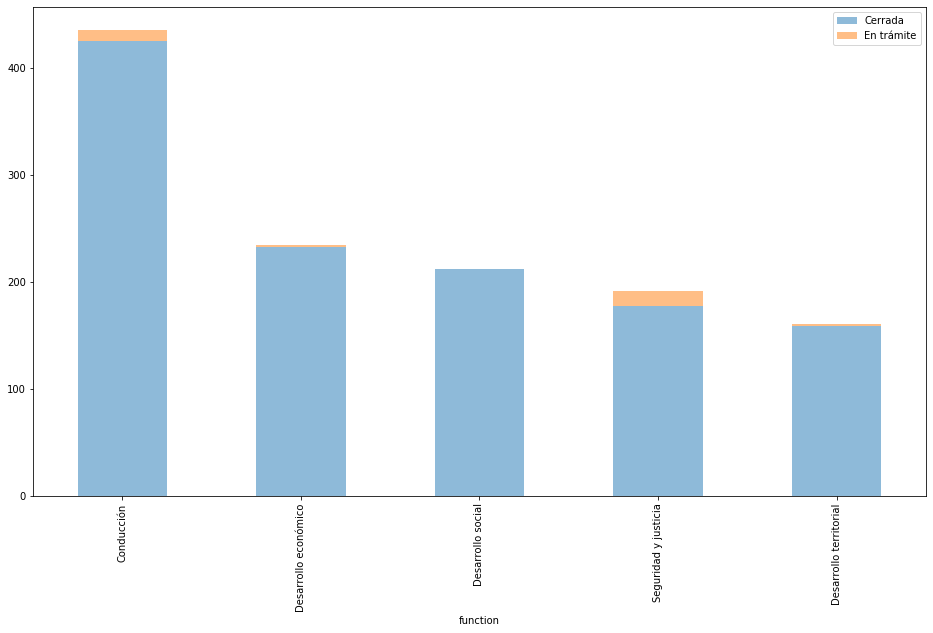

In [27]:
by_function[['Cerrada', 'En trámite']].plot(kind='bar', stacked=True, figsize=(16,9), alpha=0.5)

## Acciones

In [28]:
aux = []
for idx in range(len(data)):
    row = data.iloc[idx]
    upd = ast.literal_eval(row.updates)
    for el in upd:
        el['url'] = row.url
        el['title'] = row.overview
        el['office'] = row.office
        aux.append(el)

In [29]:
data['actions'] = data['updates'].apply(ast.literal_eval).apply(lambda x: len(x))

In [30]:
updates = pd.DataFrame(aux)
updates['month'] = updates.date.apply(lambda x: str(x)[:7])
updates = updates[updates.month <= ending]
updates.head()

,date,detail,office,title,url,month
0,2016-08-29,Remisión de petición,Ministerio de Educación,Estados financieros de centros de educación su...,https://alac.funde.org/requests/57c7169cab3ab9...,2016-08
1,2016-08-31,Se reenvió la petición porque no se recibió ac...,Ministerio de Educación,Estados financieros de centros de educación su...,https://alac.funde.org/requests/57c7169cab3ab9...,2016-08
2,2016-09-30,MINED respondió que dicha información es inexi...,Ministerio de Educación,Estados financieros de centros de educación su...,https://alac.funde.org/requests/57c7169cab3ab9...,2016-09
3,2017-05-17,Petición pasa a cerrada,Ministerio de Educación,Estados financieros de centros de educación su...,https://alac.funde.org/requests/57c7169cab3ab9...,2017-05
4,2017-08-17,Petición pasa a cerrada,Ministerio de Educación,Estados financieros de centros de educación su...,https://alac.funde.org/requests/57c7169cab3ab9...,2017-08


In [31]:
upd_by_month = updates.groupby('month').count()['detail']
upd_by_month

month
             1
2016-04      2
2016-05     41
2016-06     91
2016-07     28
2016-08     57
2016-09     76
2016-10    557
2016-11     88
2016-12      1
2017-01     43
2017-02     20
2017-03     15
2017-04     24
2017-05     83
2017-06     41
2017-07    113
2017-08    100
2017-09     44
2017-10     44
2017-11     32
2017-12     12
2018-01     64
2018-02    109
2018-03     55
2018-04     16
2018-05    106
2018-06    103
2018-07     48
2018-08     79
2018-09    167
2018-10    128
2018-11     66
2018-12     30
2019-01     32
2019-02     12
2019-03     58
2019-04    100
2019-05    106
Name: detail, dtype: int64

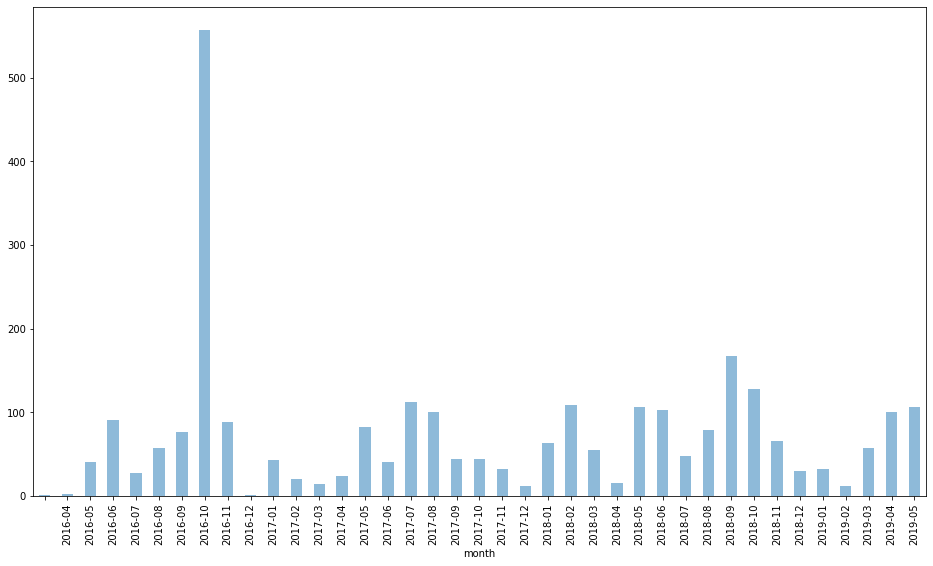

In [32]:
upd_by_month.plot(kind='bar', figsize=(16,9), alpha=0.5)

In [33]:
by_month_summ = by_month.merge(upd_by_month, on='month').rename(columns={'detail': 'Acciones'})
by_month_summ

,Cerrada,En trámite,Total,Acciones
month,,,,
2016-05,99.0,0.0,99.0,41
2016-06,39.0,0.0,39.0,91
2016-07,57.0,0.0,57.0,28
2016-08,37.0,0.0,37.0,57
2016-09,79.0,0.0,79.0,76
2016-10,190.0,0.0,190.0,557
2016-11,3.0,0.0,3.0,88
2017-01,17.0,0.0,17.0,43
2017-02,5.0,0.0,5.0,20


In [34]:
by_month_summ.sum()

Cerrada       1171.0
En trámite      28.0
Total         1199.0
Acciones      2788.0
dtype: float64

## Pronóstico

In [35]:
by_day = updates.groupby('date').count()['detail'].reset_index()
by_day.rename(columns={'date': 'ds', 'detail': 'y'}, inplace=True)
by_day.head()

,ds,y
0,,1
1,2016-04-11,2
2,2016-05-17,15
3,2016-05-18,1
4,2016-05-19,3


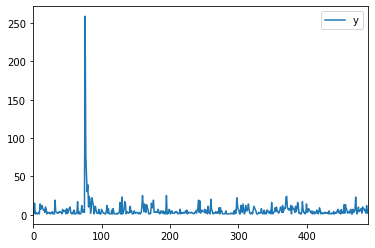

In [36]:
by_day.plot()

In [42]:
m = Prophet()
m.fit(by_day)

/usr/lib/python3.7/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
future = m.make_future_dataframe(periods=180)
forecast = m.predict(future)

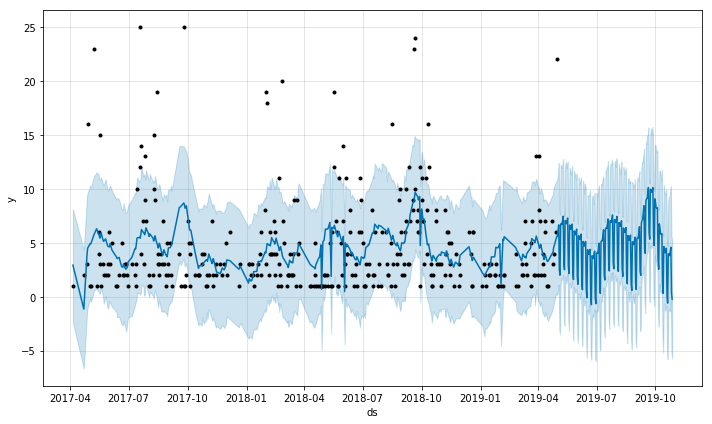

In [44]:
f = m.plot(forecast)

In [46]:
f.savefig('forecast_requests.png')

## Resumen general

In [37]:
data.columns

Index(['_id', 'case_id', 'comment', 'date', 'detail', 'documents', 'finish',
       'office', 'office_id', 'overview', 'ref', 'result', 'start', 'status',
       'updates', 'url', 'month', 'reqs', 'num', 'actions'],
      dtype='object')

In [38]:
data[['date', 'overview', 'office', 'status', 'result', 'num', 'actions', 'url']].to_csv('output/requests.csv', index=False)

In [39]:
updates['detail'] = updates['detail'].apply(lambda x: str(x).replace('\n', ' ').replace('\r', ''))

In [40]:
updates[['date', 'office', 'title', 'detail', 'url']].sort_values('date').to_csv('output/requests_actions.csv', index=False)